


\ik### We will apply the same fashion mnist using cnn and check in the accuracy increase.
#### We will first run with normal model train and later will modify the model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import fashion_mnist

In [39]:
(training_data,training_label),(test_data,test_label)=fashion_mnist.load_data()

In [40]:
training_data.shape

(60000, 28, 28)

In [41]:
training_data=training_data.reshape((-1,28,28,1))


In [45]:
training_data.shape

(60000, 28, 28, 1)

In [42]:
test_data.shape

(10000, 28, 28)

In [43]:
test_data=test_data.reshape((-1,28,28,1))


In [44]:
test_data.shape

(10000, 28, 28, 1)

### Data preprocessing

In [46]:
x_train=training_data/255
x_test=test_data/255

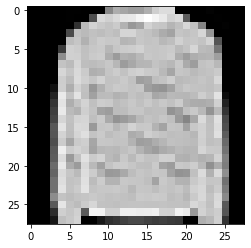

In [47]:
plt.imshow(training_data[234].reshape((28,28)),cmap='gray')

In [48]:
## Training
from tensorflow.keras.layers import Flatten,Dense

In [52]:
model=keras.Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train,training_label,epochs=5,shuffle=True)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 220us/sample - loss: 1.7129 - accuracy: 0.7565
Epoch 2/5
60000/60000 [==============================] - 11s 183us/sample - loss: 1.6733 - accuracy: 0.7891
Epoch 3/5
60000/60000 [==============================] - 13s 220us/sample - loss: 1.6652 - accuracy: 0.7968
Epoch 4/5
60000/60000 [==============================] - 14s 228us/sample - loss: 1.6570 - accuracy: 0.8049
Epoch 5/5
60000/60000 [==============================] - 12s 198us/sample - loss: 1.6536 - accuracy: 0.8079


In [55]:
model.evaluate(test_data,test_label)

10000/10000 [==============================] - 1s 86us/sample - loss: 1.6748 - accuracy: 0.7864


[1.6747845176696778, 0.7864]

### We will add some convolution layers and test
#### Two convo layers following two max layers after each convo layer

In [56]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [63]:
convo_model=keras.Sequential()
convo_model.add(Conv2D(64,(3,3),(1,1),input_shape=(28,28,1),activation=tf.nn.relu))
convo_model.add(MaxPooling2D(2,2))
convo_model.add(Conv2D(64,(3,3),(1,1),activation='relu'))
convo_model.add(MaxPooling2D(2,2))
convo_model.add(Flatten())
convo_model.add(Dense(units=128,activation=tf.nn.relu))
convo_model.add(Dense(units=10,activation=tf.nn.softmax))
convo_model.compile(optimizer='adam',
                   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [64]:
convo_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [65]:
convo_model.fit(x_train,training_label,epochs=5,shuffle=True)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 48s 807us/sample - loss: 1.7000 - accuracy: 0.7637
Epoch 2/5
60000/60000 [==============================] - 51s 858us/sample - loss: 1.6070 - accuracy: 0.8537
Epoch 3/5
60000/60000 [==============================] - 58s 959us/sample - loss: 1.5891 - accuracy: 0.8721
Epoch 4/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 1.5782 - accuracy: 0.8834
Epoch 5/5
60000/60000 [==============================] - 58s 966us/sample - loss: 1.5731 - accuracy: 0.8875


In [62]:
convo_model.evaluate(x_test,test_label)

10000/10000 [==============================] - 4s 376us/sample - loss: 0.7088 - accuracy: 0.7952


[0.7087791649341584, 0.7952]

## The above model training shows over fitting. More accuracy on training data and less accuracy on test data.

In [66]:
### changes the order of filters/features 32 in first and64 in next layer.
model=keras.Sequential()
model.add(Conv2D(
    32,(3,3),(1,1),padding='SAME',activation=tf.nn.relu,input_shape=(28,28,1)
))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),(1,1),padding='SAME',activation=tf.nn.relu))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy','mse'],)
model.summary()
model.fit(x_train,training_label,epochs=10,shuffle=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               1606144   
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [67]:
model.evaluate(x_test,test_label)

10000/10000 [==============================] - 6s 580us/sample - loss: 1.5628 - accuracy: 0.8985 - mse: 27.6990


[1.5627780633926391, 0.8985, 27.69896]

### Very less differenec between train accuracy and test accuracy